In [89]:

import models
import utils
import data_processing
from constants import (
    VALUE_COLUMN,
    UNIT_RATE_COLUMN,
    QUANTITY_COLUMN,
    GROSS_WEIGHT_COLUMN,
    SHIP_COUNT_COLUMN,
    PORT_COUNT_COLUMN,
    FILL_METHOD,
    TARGET_COLUMN
)
import pandas as pd
import constants
import sys
from datetime import datetime
from build_data import get_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

import matplotlib.pyplot as plt
import numpy as np

In [90]:
COMMODITY = "magnesium"
WINDOW_SIZE = 20

VOLZA_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}.csv"
PRICE_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}_prices.csv"

# Get the data
data = get_data(VOLZA_FILE_PATH, PRICE_FILE_PATH, window_size=WINDOW_SIZE, center=False)

# TRAIN_SIZE = 0.5

Building data...
Rows dropped due to NaN values: 1


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Detecting spikes... 20


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [91]:
data

,Date,Value,Std. Quantity (KG),Gross Weight,Std. Unit Rate ($/KG),ship_count,popular_port,popular_port_count,Price,Brent Oil Value,WTI Oil Value,ARIMA_Residuals,spikes
1,2020-01-02,1.125000e+05,50000.00,50080.0,2.250000,NaN,NaN,NaN,14150.0,67.05,61.17,14150.000000,0
2,2020-01-03,8.744076e+05,100172.26,25040.0,768.449153,NaN,NaN,NaN,14100.0,69.08,63.00,-1453.965633,0
3,2020-01-04,2.950597e+05,135000.00,0.0,2.188610,NaN,NaN,NaN,14100.0,69.08,63.00,10.015443,0
4,2020-01-05,4.420000e+04,20000.00,0.0,2.210000,NaN,NaN,NaN,14100.0,69.08,63.00,0.000000,0
5,2020-01-06,1.780024e+04,5001.00,2218.5,1450.844898,NaN,NaN,NaN,14100.0,70.25,63.27,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2022-12-27,9.624998e+04,25000.00,25040.0,3.849999,27245.0,SGSIN,9195.0,21700.0,82.45,79.45,-4500.000000,0
965,2022-12-28,1.122651e+06,286996.89,80306.0,5.656118,26021.0,SGSIN,9233.0,21650.0,81.70,78.89,-4550.000000,0
966,2022-12-29,1.303649e+06,356878.00,0.0,3.490332,24039.0,SGSIN,8861.0,21650.0,80.96,78.43,-4550.000000,0
967,2022-12-30,9.095473e+05,212842.00,44080.0,3.949859,19952.0,SGSIN,8118.0,21650.0,82.82,80.16,-4550.000000,0


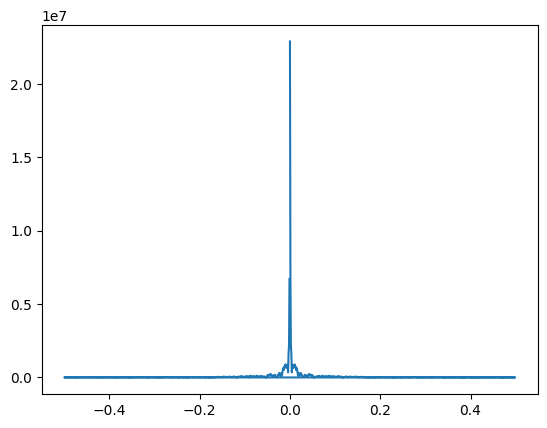

In [92]:
import numpy as np
y_fft = np.fft.fft(data['Price'])
frequencies = np.fft.fftfreq(len(y_fft))

# Plot the spectrum
plt.plot(frequencies, np.abs(y_fft))
plt.show()


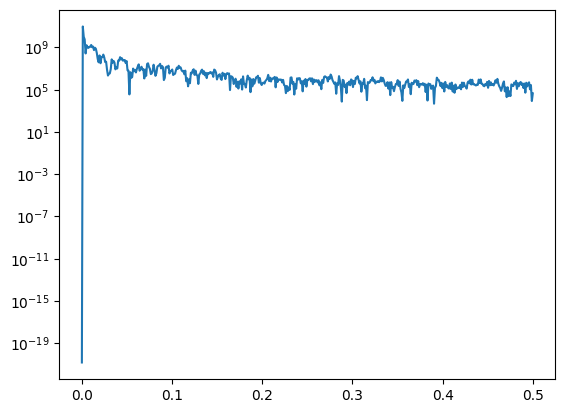

In [93]:
from scipy.signal import periodogram
frequencies, spectrum = periodogram(data['Price'])
plt.semilogy(frequencies, spectrum)
plt.show()


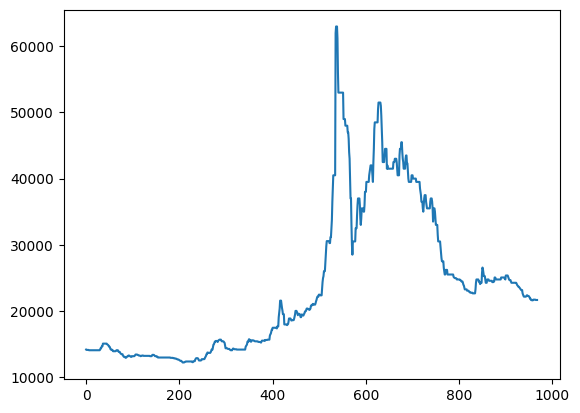

In [94]:
import matplotlib.pyplot as plt

price_df = data['Price'].copy()
price_array = price_df.to_numpy()

# plt.plot(data.index, data['Price'], label='Price', color='blue')
plt.plot(price_array)

In [95]:
import sranodec as anom

In [96]:
# less than period
amp_window_size=5
# (maybe) as same as period
series_window_size=10
# a number enough larger than period
score_window_size=15

In [97]:
spec = anom.Silency(amp_window_size, series_window_size, score_window_size)


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\sranodec\util.py:31: RuntimeWarning: invalid value encountered in scalar divide
  slope = [(last_value - v) / i for (i, v) in enumerate(values[::-1])]


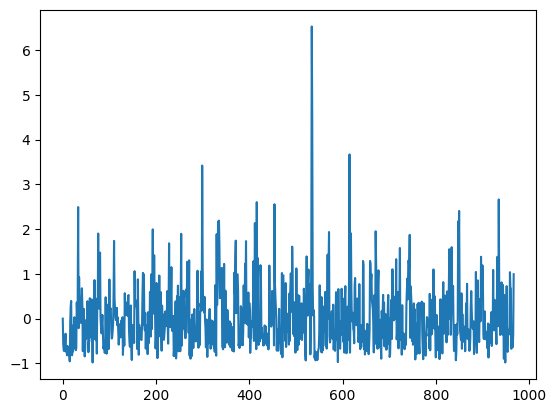

In [98]:
score = spec.generate_anomaly_score(price_array)
plt.plot(score)

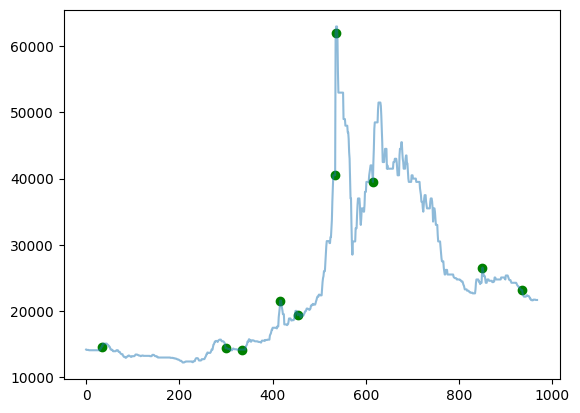

In [99]:
# Plot data with estimated anomalous points
plt.plot(price_array, alpha=0.5, label="observation")
index_changes = np.where(score > np.percentile(score, 99))[0]
plt.scatter(index_changes, price_array[index_changes], c='green', label="change point")

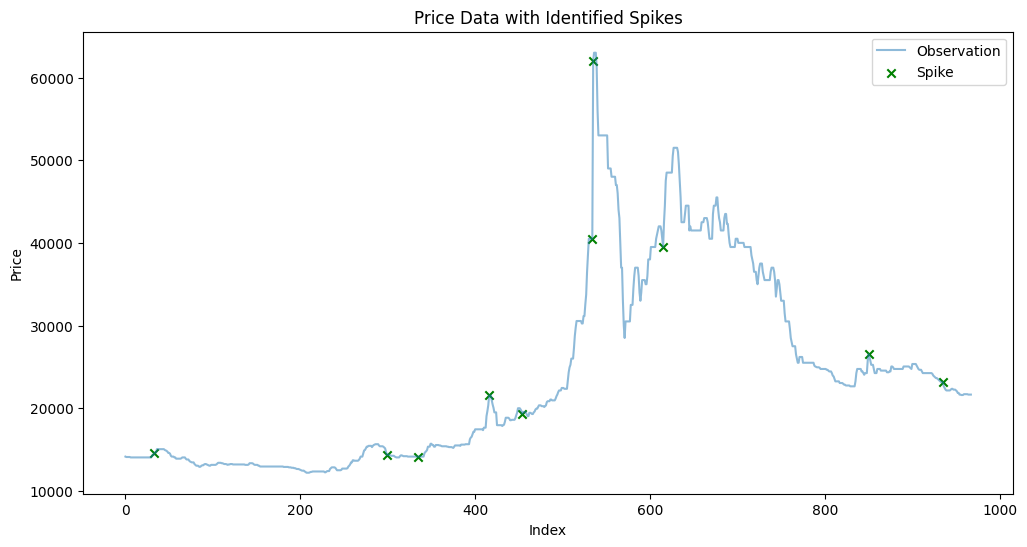

In [104]:
df = pd.DataFrame(price_array, columns=['Price'])
threshold = np.percentile(score, 99)

# Identify indices where score exceeds the threshold
index_changes = np.where(score > threshold)[0]

# Initialize a new column for spike labels with zeros (no spike)
df['Spike (SR)'] = 0

# Mark the identified spikes in the DataFrame
df.loc[index_changes, 'Spike (SR)'] = 1

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], alpha=0.5, label="Observation")
plt.scatter(df.index[index_changes], df.loc[index_changes, 'Price'], c='green', label="Spike", marker='x')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price Data with Identified Spikes')
plt.legend()
plt.show()